# **Analysis**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="white", font_scale=1.1)

from scripts import project_functions
df1 = project_functions.load_and_process('../data/raw/drug_deaths.csv')
df1.head()

,ID,Date,Age,Sex,Race,COD,Heroin,Cocaine,Fentanyl,Fentanyl_Analogue,...,Hydrocodone,Benzodiazepine,Methadone,Amphetamine,Tramadol,Morphine_NotHeroin,Hydromorphone,OpiateNOS,AnyOpioid,MannerofDeath
1,13-0102,2013-03-21,48,Male,Black,Cocaine Intoxication,0,1,0,0,...,0,0,0,0,0,0,0,0,0,Accident
2,16-0165,2016-03-13,30,Female,White,Acute Heroin and Cocaine Intoxication,1,1,0,0,...,0,0,0,0,0,0,0,0,1,Accident
3,16-0208,2016-03-31,23,Male,White,Acute Fentanyl and Morphine Intoxication,1,0,1,0,...,0,0,0,0,0,0,0,0,1,Accident
4,13-0052,2013-02-13,22,Male,"Asian, Other",Fentanyl Intoxication,0,0,1,0,...,0,0,0,0,0,0,0,0,0,Accident
5,14-0277,2014-06-29,23,Male,White,Heroin Intoxication,1,0,0,0,...,0,0,0,0,0,0,0,0,0,Accident


**1.Drug overdose deaths are becoming a public health problem in USA. Is this problem improving or worsening?**


Text(0, 0.5, 'Deaths count')

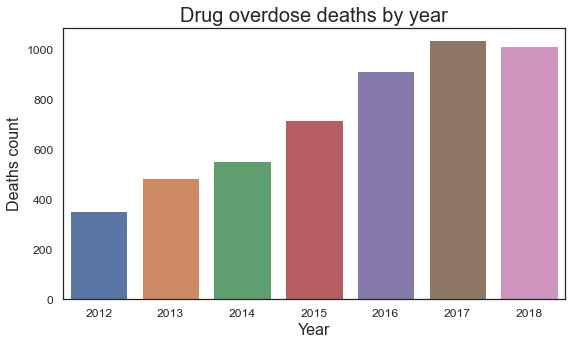

In [2]:
year = (df1['Date']).dt.year
plt.figure(figsize=[9,5])
sns.countplot(x= year,data= df1)
plt.title("Drug overdose deaths by year", fontsize=20)
plt.xlabel("Year", fontsize=16)
plt.ylabel("Deaths count", fontsize=16)

According to the plot, the deaths have increased during the studied period, with a mild improvement in 2018. The cases have almost tripled between 2012 to 2018. The trend suggests that the problem is worsening. 



**2. Who are the victims? Is this affecting men and women in the same way?**


Text(13.989525666666665, 0.5, 'Deaths count')

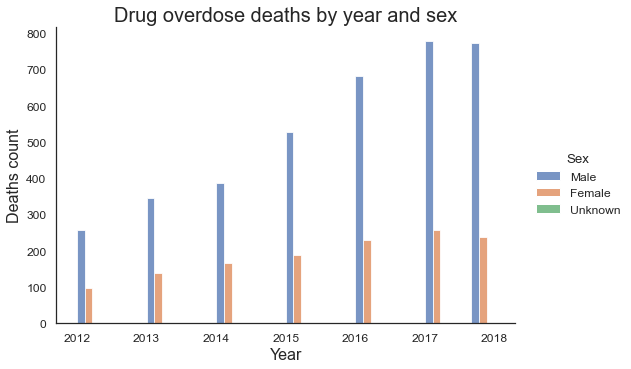

In [3]:

sns.displot(df1, x=year, hue='Sex', multiple= 'dodge', aspect= 1.5)
plt.title("Drug overdose deaths by year and sex", fontsize=20)
plt.xlabel("Year", fontsize=16)
plt.ylabel("Deaths count", fontsize=16)

This plot shows that there are more male victims. Also, male cases are increasing faster than female cases.

Text(0, 0.5, 'Sex')

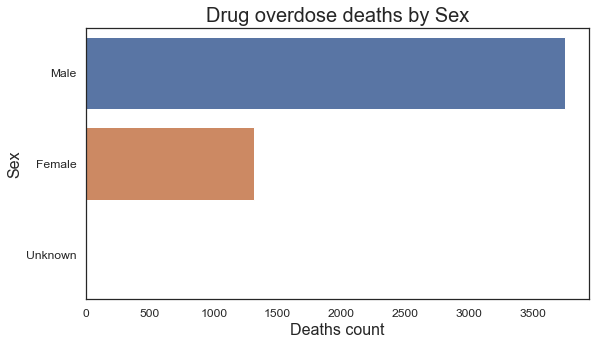

In [4]:
plt.figure(figsize=[9,5])
sns.countplot(y="Sex",data= df1)
plt.title("Drug overdose deaths by Sex", fontsize=20)
plt.xlabel("Deaths count", fontsize=16)
plt.ylabel("Sex", fontsize=16)

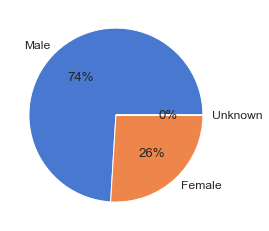

In [18]:
palette_color = sns.color_palette('muted')
s = df1['Sex'].value_counts()
plt.pie(s, labels=s.index, colors=palette_color,autopct='%.0f%%')
plt.show()

These plots show the big difference between the number of males and females victims. There are almost three times as many male cases as female.


 **3. What etnicities are more affected? Which etnicity has more victims?**
 

Text(0, 0.5, 'Race')

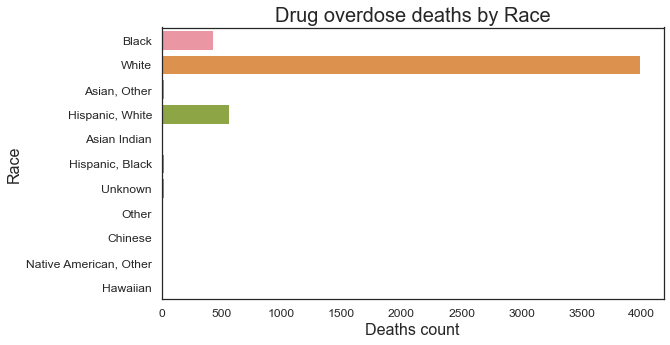

In [6]:
plt.figure(figsize=[9,5])
sns.countplot(y="Race",data= df1)
plt.title("Drug overdose deaths by Race", fontsize=20)
plt.xlabel("Deaths count", fontsize=16)
plt.ylabel("Race", fontsize=16)

The etnicity with more victims is white, with hispanic-white in the second place and black in the third place. It is important to highlight that most of the victims are white with a significant difference to the other races.

**4. What is the trend in terms of age? What is the dominant age range among the victims?**

Text(0, 0.5, 'Deaths count')

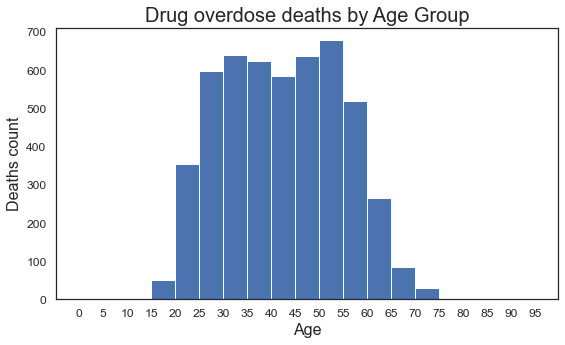

In [7]:
plt.figure(figsize=[9,5])
plt.hist(df1['Age'], bins = range(0, 100, 5))
plt.title("Drug overdose deaths by Age Group", fontsize=20)
plt.xticks(range(0, 100, 5))
plt.xlabel('Age', fontsize=16)
plt.ylabel('Deaths count', fontsize=16)


This plot shows that the range with the most victims is between 50 and 55 years old. However, this plot also shows that, in general, the age range with the most cases of drug overdose deaths is 25 to 55 years old. Cases begin with people aged 15-20 and increase in the 20-25 range, with a big jump in the 25-30 range. The number of victims remains relatively stable for people aged 25-55; after age 55 the cases begin to decrease. The drop in cases is significant after age 60.

**5. What is the most letal drug?**

Text(0, 0.5, 'Drug')

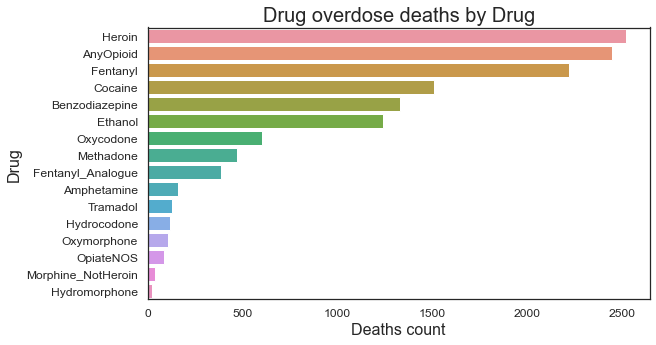

In [8]:
drugs = df1.loc[:,'Heroin':'AnyOpioid']
drug_names = ['Heroin', 'Cocaine', 'Fentanyl', 'Fentanyl_Analogue',
       'Oxycodone', 'Oxymorphone', 'Ethanol', 'Hydrocodone', 'Benzodiazepine',
       'Methadone', 'Amphetamine', 'Tramadol', 'Morphine_NotHeroin', 'Hydromorphone',
        'OpiateNOS', 'AnyOpioid']
count = drugs.sum().values
df2 = pd.DataFrame(data=[count],columns=[drug_names])
df3 = (df2.melt(value_vars=[drug_names],var_name='Drug', value_name='Count'))

plt.figure(figsize=[9,5])
sns.barplot(data=df3, y="Drug", x = "Count", order=df3.sort_values('Count',ascending=False).Drug)
plt.title("Drug overdose deaths by Drug", fontsize=20)
plt.xlabel("Deaths count", fontsize=16)
plt.ylabel("Drug", fontsize=16)




This plot shows that heroin is the most letal drug; however the second place is for AnyOpiod which includes heroin and fentanyl. Also,from the exploratoty data analysis done in task 3, the cases by cause of death plot shows that the most letal drug is Fentanyl. Since there are many multidrug cases I would say that both heroin and fentanyl are the most letal drugs. 